C:\Users\vbitu\AppData\Local\Temp\ipykernel_14740\1963683931.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['data_publicacao'] = pd.to_datetime(df['data_publicacao'], dayfirst=True, errors='coerce')


Sem dados válidos para gerar o gráfico.


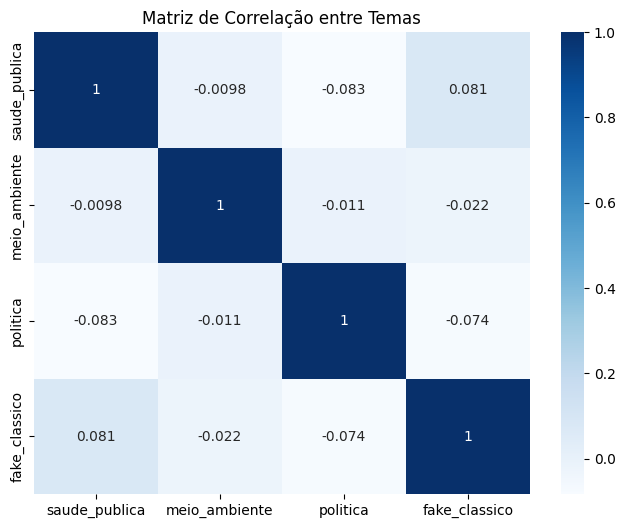

veredito
falso              3580
indisponível        520
distorcido          154
não é bem assim     153
exagerado             5
insustentável         4
impreciso             2
Name: count, dtype: int64
veredito  distorcido  exagerado  falso  impreciso  indisponível  \
politica                                                          
0                 43          1    939          0            40   
1                111          4   2641          2           480   

veredito  insustentável  não é bem assim  
politica                                  
0                     0               24  
1                     4              129  


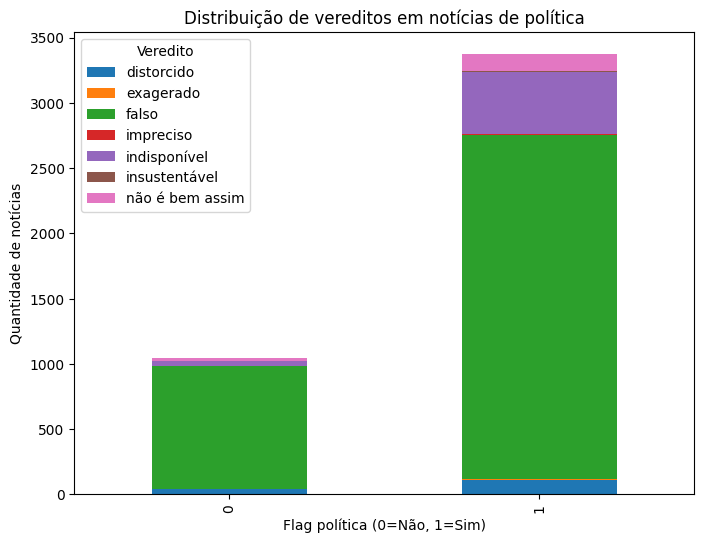

In [4]:
# ===============================
# Análise Exploratória Temática (Bloco 4 Final Revisado)
# ===============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 1️⃣ Leitura segura do CSV e tratamento de data
# ===============================

# Leitura padrão (sem parse ainda)
df = pd.read_csv(r'C:\Users\vbitu\projects\fake-news-etl-project\data\processed\dados_aosfatos_tematico.csv')

# Conversão robusta da data após leitura
df['data_publicacao'] = pd.to_datetime(df['data_publicacao'], dayfirst=True, errors='coerce')
df['ano'] = df['data_publicacao'].dt.year

# ===============================
# 2️⃣ Distribuição de temas por ano
# ===============================

# Filtra apenas registros com ano válido
df_valid = df[df['ano'].notna()]

# Agrupamento por ano e soma dos temas
temas_ano = df_valid.groupby('ano')[['saude_publica', 'meio_ambiente', 'politica', 'fake_classico']].sum()

# Verificação de segurança antes de plotar
if not temas_ano.empty:
    temas_ano.plot(kind='bar', figsize=(12,6))
    plt.title("Distribuição dos temas por ano")
    plt.ylabel("Quantidade de notícias")
    plt.xlabel("Ano")
    plt.xticks(rotation=45)
    plt.legend(title="Temas")
    plt.tight_layout()
    plt.show()
else:
    print("Sem dados válidos para gerar o gráfico.")

# ===============================
# 3️⃣ Coocorrência de temas (correlação)
# ===============================

correlacao = df[['saude_publica', 'meio_ambiente', 'politica', 'fake_classico']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlacao, annot=True, cmap='Blues')
plt.title("Matriz de Correlação entre Temas")
plt.show()

# ===============================
# 4️⃣ Cruzamento de temas e vereditos
# ===============================

# Distribuição dos vereditos
print(df['veredito'].value_counts())

# Exemplo: relação entre política e veredito
tabela_politica_veredito = pd.crosstab(df['politica'], df['veredito'])
print(tabela_politica_veredito)

# Visualização opcional
tabela_politica_veredito.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Distribuição de vereditos em notícias de política")
plt.xlabel("Flag política (0=Não, 1=Sim)")
plt.ylabel("Quantidade de notícias")
plt.legend(title="Veredito")
plt.show()


In [2]:
df['data_publicacao'].head(10)


0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
5   NaT
6   NaT
7   NaT
8   NaT
9   NaT
Name: data_publicacao, dtype: datetime64[ns]